<h1>Project: 2019 Impact Fellowship-Education Pioneers. Investigate the ELA program Datasets 2016-2017</h1>
<h3>Autor: Francihelena Uzcategui</h3>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis </a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>


<h3>Introduction </h3>

 <p>The Education Pioneers datasets have univariate and bivariate data to analyze — relations between Education and Demographic indexes, and how they affect the growth and development of students. </p>

<h5>Questions </h5>
    
<h6>1- How did the pilot school 5th graders’ ELA mean scores compare to the non-pilot 5th graders in 2017 (2016 - 2017 school year)?</h6> 
        <p>1.1- What was the average score of all the pilot schools combined?</p>
        <p>1.2- What was the average score of all the non-pilot schools combined?</p>.
<h6>2- Which pilot school exhibited the most growth in ELA mean scale scores?</h6>
        <p>2.1- Which pilot school exhibited the most growth in ELA mean scale scores from the 2016 test through the 2017 test</p>
        <p>2.2- What is the percentage difference in this school’s 5th grade growth from 2016 through 2017 compared to the other pilot schools’ 5th grade average growth during the same time period?</p>
<h6>3- What was the average percentage of students who received free/reduced lunch in the 5 pilot schools in 2017?</h6>
<h6>4- What was the average ELA mean test score of the non-pilot schools that have an equal or greater percentage of students who qualify for free/reduced lunch as the pilot schools? Only look at the 5th grade class in the 2017 school year.</h6> 

<h3> I Dataset </h3>

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt

<h6>Data Wrangling</h6>

In [2]:
df = pd.read_csv('C:/Users/Franchi/Documents/Projects Data Analysis/Education Pioneers/data exercise1.csv')
df.head()


,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score,% Did Not Meet,% Partially Met,% Approached,% Met,% Exceeded,...,% Did Not Yet Meet or Partially Met.2,% Approached.3,% Met or Exceeded.3,Writing Mean Scale Score,% Did Not Yet Meet or Partially Met.3,% Approached.4,% Met or Exceeded.4,% Did Not Yet Meet or Partially Met.4,% Approached.5,% Met or Exceeded.5
0,400009,2017,Combined ELA Grades 3-8,179,,19.00%,31.30%,22.90%,26.30%,0.60%,...,48.60%,22.30%,29.10%,,53.10%,25.10%,21.80%,47.50%,27.40%,25.10%
1,400011,2017,Combined ELA Grades 3-8,297,,7.70%,12.10%,38.00%,38.40%,3.70%,...,33.30%,24.90%,41.80%,,28.60%,24.60%,46.80%,26.90%,25.90%,47.10%
2,400017,2017,Combined ELA Grades 3-8,524,,35.90%,28.20%,24.00%,10.90%,1.00%,...,64.70%,18.50%,16.80%,,67.90%,16.60%,15.50%,66.40%,18.90%,14.70%
3,400021,2017,Combined ELA Grades 3-8,330,,27.90%,27.00%,28.20%,15.80%,1.20%,...,53.90%,24.20%,21.80%,,65.50%,17.00%,17.60%,60.30%,18.80%,20.90%
4,400023,2017,Combined ELA Grades 3-8,268,,9.30%,21.60%,32.10%,33.20%,3.70%,...,39.90%,29.10%,31.00%,,34.00%,19.80%,46.30%,28.40%,25.00%,46.60%


<h6>Data Cleaning</h6>

From the original csv file, we deleted the first row along all the columns to avoid issues at the moment of importing; it was 'unnamed.'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 28 columns):
School_ID                                6762 non-null int64
Year                                     6762 non-null int64
Test Name                                6762 non-null object
# Students Tested                        6762 non-null object
Overall_ELA_Mean_Scale_Score             6761 non-null object
% Did Not Meet                           6762 non-null object
% Partially Met                          6762 non-null object
% Approached                             6762 non-null object
% Met                                    6762 non-null object
% Exceeded                               6762 non-null object
% Met or Exceeded                        6762 non-null object
Reading Mean Scale Score                 6762 non-null object
% Did Not Yet Meet or Partially Met      6762 non-null object
% Approached.1                           6762 non-null object
% Met or Exceeded.1        

In [4]:
df.dtypes

School_ID                                 int64
Year                                      int64
Test Name                                object
# Students Tested                        object
Overall_ELA_Mean_Scale_Score             object
% Did Not Meet                           object
% Partially Met                          object
% Approached                             object
% Met                                    object
% Exceeded                               object
% Met or Exceeded                        object
Reading Mean Scale Score                 object
% Did Not Yet Meet or Partially Met      object
% Approached.1                           object
% Met or Exceeded.1                      object
% Did Not Yet Meet or Partially Met.1    object
% Approached.2                           object
% Met or Exceeded.2                      object
% Did Not Yet Meet or Partially Met.2    object
% Approached.3                           object
% Met or Exceeded.3                     

Changing Overall_ELA_Mean_Scale_Score str to int. After too many fail attemps the solution includes two steps. 
First to fill the empty rows with 0 (ValueError: invalid literal for int() with base 10 ''). 
Second directly we transformed str to int.
Source:https://www.ritchieng.com/pandas-changing-datatype/, https://stackoverflow.com/questions/25586085/replace-whitespace-with-a-0-in-pandas-python-3, https://stackoverflow.com/questions/10591000/specifying-data-type-in-pandas-csv-reader?fbclid=IwAR2qm41ZUc8su98ftOUtS-aDYpaUxdBhAVk616p6T3xajgUh9UhovBA01c4

Changing data type by .to_numeric() 
"Pandas operations like to_numeric don't operate "in-place" by default. I recommend that you assign the result to a column in your dataframe.
df['Period_numbers'] = pd.to_numeric(df['Period'], errors='coerce') Same goes with dropna.
In most cases you can pass inplace=True to the method or function. But I really do recommend assigning the results instead"

Source:https://stackoverflow.com/questions/40493726/pd-to-numeric-is-not-working-in-python

In [5]:
df['Overall_ELA_Mean_Scale_Score_numbers'] = pd.to_numeric(df['Overall_ELA_Mean_Scale_Score'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 29 columns):
School_ID                                6762 non-null int64
Year                                     6762 non-null int64
Test Name                                6762 non-null object
# Students Tested                        6762 non-null object
Overall_ELA_Mean_Scale_Score             6761 non-null object
% Did Not Meet                           6762 non-null object
% Partially Met                          6762 non-null object
% Approached                             6762 non-null object
% Met                                    6762 non-null object
% Exceeded                               6762 non-null object
% Met or Exceeded                        6762 non-null object
Reading Mean Scale Score                 6762 non-null object
% Did Not Yet Meet or Partially Met      6762 non-null object
% Approached.1                           6762 non-null object
% Met or Exceeded.1        

We are dealing with unnamed columns. Source: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

In [7]:
data=df.dropna(how='all', axis='columns')
data.head()

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score,% Did Not Meet,% Partially Met,% Approached,% Met,% Exceeded,...,% Approached.3,% Met or Exceeded.3,Writing Mean Scale Score,% Did Not Yet Meet or Partially Met.3,% Approached.4,% Met or Exceeded.4,% Did Not Yet Meet or Partially Met.4,% Approached.5,% Met or Exceeded.5,Overall_ELA_Mean_Scale_Score_numbers
0,400009,2017,Combined ELA Grades 3-8,179,,19.00%,31.30%,22.90%,26.30%,0.60%,...,22.30%,29.10%,,53.10%,25.10%,21.80%,47.50%,27.40%,25.10%,NaN
1,400011,2017,Combined ELA Grades 3-8,297,,7.70%,12.10%,38.00%,38.40%,3.70%,...,24.90%,41.80%,,28.60%,24.60%,46.80%,26.90%,25.90%,47.10%,NaN
2,400017,2017,Combined ELA Grades 3-8,524,,35.90%,28.20%,24.00%,10.90%,1.00%,...,18.50%,16.80%,,67.90%,16.60%,15.50%,66.40%,18.90%,14.70%,NaN
3,400021,2017,Combined ELA Grades 3-8,330,,27.90%,27.00%,28.20%,15.80%,1.20%,...,24.20%,21.80%,,65.50%,17.00%,17.60%,60.30%,18.80%,20.90%,NaN
4,400023,2017,Combined ELA Grades 3-8,268,,9.30%,21.60%,32.10%,33.20%,3.70%,...,29.10%,31.00%,,34.00%,19.80%,46.30%,28.40%,25.00%,46.60%,NaN


We select only the columns to use for the analysis

In [8]:
data=data.filter(["School_ID", "Year", "Test Name", "# Students Tested", "Overall_ELA_Mean_Scale_Score_numbers", "Reading Mean Scale Score", "Writing Mean Scale Score"])
data.head()

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
0,400009,2017,Combined ELA Grades 3-8,179,NaN,,
1,400011,2017,Combined ELA Grades 3-8,297,NaN,,
2,400017,2017,Combined ELA Grades 3-8,524,NaN,,
3,400021,2017,Combined ELA Grades 3-8,330,NaN,,
4,400023,2017,Combined ELA Grades 3-8,268,NaN,,


<h6>Exploratory Data Analysis</h6>

<strong>1- How did the pilot school 5th graders’ ELA mean scores compare to the non-pilot 5th graders in 2017 (2016 - 2017 school year)?</strong>
    
   <strong> 1.1- What was the average score of all the pilot schools combined?</strong>

In [9]:
pilot_schools_selection=data[data.School_ID.isin([609880,610534, 610066,610082,610182])]
pilot_schools_selection.head()

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
154,609880,2017,Combined ELA Grades 3-8,169,NaN,,
287,610066,2017,Combined ELA Grades 3-8,108,NaN,,
297,610082,2017,Combined ELA Grades 3-8,679,NaN,,
374,610182,2017,Combined ELA Grades 3-8,168,NaN,,
483,610534,2017,Combined ELA Grades 3-8,290,NaN,,


We select specific rows from a column. Source: DatabyDavid=https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [10]:
pilot_grade_5th = pilot_schools_selection['Test Name'] == 'ELA/Literacy Grade 5'
pilot_schools_5th=pilot_schools_selection[pilot_grade_5th]

In [11]:
pilot_schools_5th

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
1540,609880,2017,ELA/Literacy Grade 5,29,792.0,64,40
1669,610066,2017,ELA/Literacy Grade 5,27,786.0,63,43
1679,610082,2017,ELA/Literacy Grade 5,102,774.0,55,38
1753,610182,2017,ELA/Literacy Grade 5,24,768.0,56,39
1854,610534,2017,ELA/Literacy Grade 5,62,795.0,68,44
1855,610534,2017,ELA/Literacy Grade 5,62,795.0,68,44
4914,609880,2016,ELA/Literacy Grade 5,30,791.0,68,42
4915,609880,2016,ELA/Literacy Grade 5,30,791.0,68,42
5045,610066,2016,ELA/Literacy Grade 5,29,772.0,59,39
5055,610082,2016,ELA/Literacy Grade 5,112,768.0,54,38


In [12]:
pilot_schools_5th.duplicated()

1540    False
1669    False
1679    False
1753    False
1854    False
1855     True
4914    False
4915     True
5045    False
5055    False
5131    False
5232    False
dtype: bool

In [13]:
pilot_schools_selection.duplicated().sum()

2

We tried to drop the duplicate values from 'Overall_ELA_Mean_Scale_Score,' but it doesn't work because it takes the School ID column too. Thus, we dropped by index the two values identified, according to the above data frame.
Source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

1st Fail attempt==> pilot_schools_5th.drop_duplicates("Overall_ELA_Mean_Scale_Score", keep='first', inplace=False)
2nd Fail attempt==> pilot_schools_5th.drop_duplicates(subset=['Overall_ELA_Mean_Scale_Score']).shape / R= 9,7 ==> It considered three duplicated values instead of two values or "True"

In [14]:
#Deleting duplicate rows at index position 5 & 6
pilot_schools_5th_non_duplicates=pilot_schools_5th.drop(pilot_schools_5th.index[[5,6]])
pilot_schools_5th_non_duplicates

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
1540,609880,2017,ELA/Literacy Grade 5,29,792.0,64,40
1669,610066,2017,ELA/Literacy Grade 5,27,786.0,63,43
1679,610082,2017,ELA/Literacy Grade 5,102,774.0,55,38
1753,610182,2017,ELA/Literacy Grade 5,24,768.0,56,39
1854,610534,2017,ELA/Literacy Grade 5,62,795.0,68,44
4915,609880,2016,ELA/Literacy Grade 5,30,791.0,68,42
5045,610066,2016,ELA/Literacy Grade 5,29,772.0,59,39
5055,610082,2016,ELA/Literacy Grade 5,112,768.0,54,38
5131,610182,2016,ELA/Literacy Grade 5,28,764.0,54,38
5232,610534,2016,ELA/Literacy Grade 5,58,793.0,64,45


"The mean of means is simply the mean of all of the means of several samples. By calculating the mean of the sample means, you have a single value that can help summarize a lot of data.
The mean of means, notated here as μx¯¯¯, is actually a pretty straightforward calculation. Simply sum the means of all your samples and divide by the number of means."
Source:https://www.ck12.org/book/CK-12-Probability-and-Statistics-Concepts/section/9.6/

In [15]:
total_mean_pilot_schools_5thgrade=pilot_schools_5th_non_duplicates['Overall_ELA_Mean_Scale_Score_numbers'].mean()
print(total_mean_pilot_schools_5thgrade)

780.3


  <strong>1.2- What was the average score of all the non-pilot schools combined?</strong>

In [16]:
#Source: https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas
nonpilot_schools_selection=data[data["School_ID"].apply(lambda x:x not in [609880,610534, 610066,610082,610182])] 
nonpilot_schools_selection.head()

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
0,400009,2017,Combined ELA Grades 3-8,179,NaN,,
1,400011,2017,Combined ELA Grades 3-8,297,NaN,,
2,400017,2017,Combined ELA Grades 3-8,524,NaN,,
3,400021,2017,Combined ELA Grades 3-8,330,NaN,,
4,400023,2017,Combined ELA Grades 3-8,268,NaN,,


In [17]:
nonpilot_schools_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6761
Data columns (total 7 columns):
School_ID                               6698 non-null int64
Year                                    6698 non-null int64
Test Name                               6698 non-null object
# Students Tested                       6698 non-null object
Overall_ELA_Mean_Scale_Score_numbers    5555 non-null float64
Reading Mean Scale Score                6698 non-null object
Writing Mean Scale Score                6698 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 418.6+ KB


In [18]:
nonpilot_grade_5th= nonpilot_schools_selection['Test Name'] == 'ELA/Literacy Grade 5'
nonpilot_schools_5th=nonpilot_schools_selection[nonpilot_grade_5th]

In [19]:
nonpilot_schools_5th.head()

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
1408,400009,2017,ELA/Literacy Grade 5,30,709.0,36,18
1409,400011,2017,ELA/Literacy Grade 5,49,744.0,47,33
1410,400021,2017,ELA/Literacy Grade 5,55,718.0,38,24
1411,400023,2017,ELA/Literacy Grade 5,55,733.0,43,30
1412,400024,2017,ELA/Literacy Grade 5,65,734.0,44,30


In [20]:
nonpilot_schools_5th.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1408 to 5238
Data columns (total 7 columns):
School_ID                               905 non-null int64
Year                                    905 non-null int64
Test Name                               905 non-null object
# Students Tested                       905 non-null object
Overall_ELA_Mean_Scale_Score_numbers    905 non-null float64
Reading Mean Scale Score                905 non-null object
Writing Mean Scale Score                905 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 56.6+ KB


In [21]:
nonpilot_schools_5th.duplicated().sum()

0

After checked duplicates values of the whole dataframe, we can proceed to calculate nonpilot schools mean

In [22]:
type(nonpilot_schools_5th)

pandas.core.frame.DataFrame

In [23]:
total_mean_nonpilot_schools_5thgrade=nonpilot_schools_5th['Overall_ELA_Mean_Scale_Score_numbers'].mean()
print(total_mean_nonpilot_schools_5thgrade)

725.2696132596685


<strong>2- Which pilot school exhibited the most growth in ELA mean scale scores?</strong>

<strong>2.1- Which pilot school exhibited the most growth in ELA mean scale scores from the 2016 test through the 2017 test</strong>

In [24]:
grow_ELAscore_pilot_shools_2016_2017=pilot_schools_5th_non_duplicates.groupby('School_ID').Overall_ELA_Mean_Scale_Score_numbers.mean().reset_index()
print(grow_ELAscore_pilot_shools_2016_2017)

   School_ID  Overall_ELA_Mean_Scale_Score_numbers
0     609880                                 791.5
1     610066                                 779.0
2     610082                                 771.0
3     610182                                 766.0
4     610534                                 794.0


In [25]:
School_ID_grow_ELAscore_pilot_shools_2016_2017=grow_ELAscore_pilot_shools_2016_2017.School_ID
School_ID_grow_ELAscore_pilot_shools_2016_2017

0    609880
1    610066
2    610082
3    610182
4    610534
Name: School_ID, dtype: int64

In [26]:
Grow_ELA_mean_score_pilot_shools_2016_2017=grow_ELAscore_pilot_shools_2016_2017.Overall_ELA_Mean_Scale_Score_numbers
Grow_ELA_mean_score_pilot_shools_2016_2017

0    791.5
1    779.0
2    771.0
3    766.0
4    794.0
Name: Overall_ELA_Mean_Scale_Score_numbers, dtype: float64

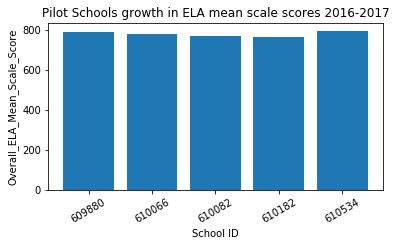

In [27]:
plt.figure(figsize=(6,4))
ax=plt.subplot()
plt.bar(range(len(Grow_ELA_mean_score_pilot_shools_2016_2017)),Grow_ELA_mean_score_pilot_shools_2016_2017)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(School_ID_grow_ELAscore_pilot_shools_2016_2017)
plt.xticks(rotation=30)
plt.subplots_adjust(bottom=0.30)
plt.title("Pilot Schools growth in ELA mean scale scores 2016-2017")
plt.xlabel('School ID') 
plt.ylabel('Overall_ELA_Mean_Scale_Score')
plt.savefig('Pilot Schools growth in ELA mean scale scores2.png')
plt.show()

<strong>2.2- What is the percentage difference in this school’s 5th grade growth from 2016 through 2017 compared to the other pilot schools’ 5th grade average growth during the same time period?</strong>

In [28]:
#Source; https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
new = pilot_schools_5th_non_duplicates[['School_ID','Year','Overall_ELA_Mean_Scale_Score_numbers']].copy()
new

,School_ID,Year,Overall_ELA_Mean_Scale_Score_numbers
1540,609880,2017,792.0
1669,610066,2017,786.0
1679,610082,2017,774.0
1753,610182,2017,768.0
1854,610534,2017,795.0
4915,609880,2016,791.0
5045,610066,2016,772.0
5055,610082,2016,768.0
5131,610182,2016,764.0
5232,610534,2016,793.0


We want to know the performance of each pilot school by year (2016 and 2017). We are using Group by and Split. Source: https://www.youtube.com/watch?v=Wb2Tp35dZ-I

In [29]:
Year_pilot_schools=pilot_schools_5th_non_duplicates.groupby('Year')
Year_pilot_schools

In [30]:
for Year, Overall_ELA_Mean_Scale_Score_numbers in Year_pilot_schools:
    print(Year)
    print(Overall_ELA_Mean_Scale_Score_numbers)

2016
      School_ID  Year             Test Name # Students Tested  \
4915     609880  2016  ELA/Literacy Grade 5                30   
5045     610066  2016  ELA/Literacy Grade 5                29   
5055     610082  2016  ELA/Literacy Grade 5               112   
5131     610182  2016  ELA/Literacy Grade 5                28   
5232     610534  2016  ELA/Literacy Grade 5                58   

      Overall_ELA_Mean_Scale_Score_numbers Reading Mean Scale Score  \
4915                                 791.0                       68   
5045                                 772.0                       59   
5055                                 768.0                       54   
5131                                 764.0                       54   
5232                                 793.0                       64   

     Writing Mean Scale Score  
4915                       42  
5045                       39  
5055                       38  
5131                       38  
5232             

In [31]:
First_values=Year_pilot_schools.get_group(2016)
First_values

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
4915,609880,2016,ELA/Literacy Grade 5,30,791.0,68,42
5045,610066,2016,ELA/Literacy Grade 5,29,772.0,59,39
5055,610082,2016,ELA/Literacy Grade 5,112,768.0,54,38
5131,610182,2016,ELA/Literacy Grade 5,28,764.0,54,38
5232,610534,2016,ELA/Literacy Grade 5,58,793.0,64,45


In [32]:
Second_values=Year_pilot_schools.get_group(2017)
Second_values

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score_numbers,Reading Mean Scale Score,Writing Mean Scale Score
1540,609880,2017,ELA/Literacy Grade 5,29,792.0,64,40
1669,610066,2017,ELA/Literacy Grade 5,27,786.0,63,43
1679,610082,2017,ELA/Literacy Grade 5,102,774.0,55,38
1753,610182,2017,ELA/Literacy Grade 5,24,768.0,56,39
1854,610534,2017,ELA/Literacy Grade 5,62,795.0,68,44


Now the schools are splits by year we can subtract each column "Overall_ELA_Mean_Scale_Score" by year. After multiple attempts, we prefer this solution by collections and dictionaries. Source: https://pythontic.com/containers/counter/subtract, https://docs.python.org/3/library/collections.html

The difference between each pilot school:

In [33]:
import collections

In [34]:
# create two boxes

year2016 = collections.Counter({"609880":791,"610066":772,"610082":768,"610182":764, "610534":793})

year2017 = collections.Counter({"609880":792,"610066":786,"610082":774,"610182":768, "610534":795}) 

# subtract year2017 from year2016

ret = year2016.subtract(year2017)

#print year2016 contents

print(year2016)

Counter({'609880': -1, '610534': -2, '610182': -4, '610082': -6, '610066': -14})


By hand, we create a variable with the previous dictionary values but omitting the negative sings

In [35]:
dict_sub_years=({'609880':[1], '610534': [2], '610182': [4], '610082': [6], '610066': [14]})

Converting dictionary to dataframe

In [36]:
frame_sub_years=pd.DataFrame.from_dict(dict_sub_years)
frame_sub_years

,609880,610066,610082,610182,610534
0,1,14,6,4,2


Average of each pilot school:
    
 <p>a)Sum</p>

In [37]:
year_2016 = {"609880":791,"610066":772,"610082":768,"610182":764, "610534":793}

year_2017 = {"609880":792,"610066":786,"610082":774,"610182":768, "610534":795}

In [38]:
#Source:https://stackoverflow.com/questions/10461531/merge-and-sum-of-two-dictionaries
print({ k: year_2016.get(k, 0) + year_2017.get(k, 0) for k in set(year_2016) })

{'610534': 1588, '610182': 1532, '610082': 1542, '610066': 1558, '609880': 1583}


By hand, we create a variable with the previous dictionary values

In [39]:
dict_sum_years={'610534':[1588], '609880': [1583], '610182': [1532], '610066': [1558], '610082': [1542]}

Converting dictionary to dataframe

In [40]:
frame_sum_years=pd.DataFrame.from_dict(dict_sum_years)
frame_sum_years

,609880,610066,610082,610182,610534
0,1583,1558,1542,1532,1588


<p>b)Average</p>

In [41]:
frame_avg_sum_years=frame_sum_years.iloc[:, :]/2
frame_avg_sum_years

,609880,610066,610082,610182,610534
0,791.5,779.0,771.0,766.0,794.0


To get the percentage of the difference, we must divide frame_sub_years/frame_avg_sum_years*100

In [42]:
percentage_difference_pilot_schools=(frame_sub_years/frame_avg_sum_years)*100
percentage_difference_pilot_schools

,609880,610066,610082,610182,610534
0,0.126342,1.797176,0.77821,0.522193,0.251889


<h2> II Dataset : for 3rd and 4th questions <h2>

<h6>Data Wrangling </h6>

In [43]:
df2 = pd.read_csv('C:/Users/Franchi/Documents/Projects Data Analysis/Education Pioneers/data exercise2.csv')
df2.head()

,School_Year,School_ID,Total,Bilingual_N,Bilingual_%,SpED_N,SpED_%,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,2017,610212,277,56.0,20.22%,42.0,15.16%,264,0.9531
1,2017,610209,921,522.0,56.68%,99.0,10.75%,842,0.9142
2,2017,609836,849,159.0,18.73%,104.0,12.25%,404,0.4759
3,2017,609729,1812,320.0,17.66%,336.0,18.54%,1649,0.9100
4,2017,610083,173,66.0,38.15%,114.0,65.90%,95,0.5491


<h6>Data Cleaning</h6>

<ol>Changes in the cvs file: 
<li>The first row was deleted and modified because of when imported it the title of columns were 'unnamed.'</li>
<li>School_Year and School_ID column names are changed because we added underscore sing.</li>
<li>The datatype of Free_ReducedLunch% changed to general and without the percentage sign.</li>
<li>The datatype of Total and Free_Reduced_Lunch_N, changed from General type to Number type and decrease decimal, avoiding the comma sign (Ex. 1,812)</li>

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 9 columns):
School_Year             2018 non-null object
School_ID               2018 non-null int64
Total                   2018 non-null int64
Bilingual_N             1824 non-null float64
Bilingual_%             1824 non-null object
SpED_N                  2016 non-null float64
SpED_%                  2016 non-null object
Free_Reduced_Lunch_N    2018 non-null int64
Free_Reduced_Lunch_%    2018 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 142.0+ KB


Due to our column object is Free/Reduced lunch we don't care about the null values from Bilingual column.

Changing data types by pandas.to_numeric method. Source:https://www.geeksforgeeks.org/python-pandas-to_numeric-method/

In [45]:
df2.dtypes

School_Year              object
School_ID                 int64
Total                     int64
Bilingual_N             float64
Bilingual_%              object
SpED_N                  float64
SpED_%                   object
Free_Reduced_Lunch_N      int64
Free_Reduced_Lunch_%    float64
dtype: object

The "School_Year" and "School_ID" name columns changed from the original csv

We select specific columns to use for the analysis

In [46]:
data2=df2.filter(["School_Year","School_ID", "Total", "Free_Reduced_Lunch_N", "Free_Reduced_Lunch_%"])
data2.head()

,School_Year,School_ID,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,2017,610212,277,264,0.9531
1,2017,610209,921,842,0.9142
2,2017,609836,849,404,0.4759
3,2017,609729,1812,1649,0.9100
4,2017,610083,173,95,0.5491


<h6>Exploratory Data Analysis</h6>

<strong>3- What was the average percentage of students who received free/reduced lunch in the 5 pilot schools in 2017?</strong>

In [47]:
free_lunch_pilot_schools_selection=data2[data2.School_ID.isin([609880,610534, 610066,610082,610182])]
free_lunch_pilot_schools_selection

,School_Year,School_ID,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
13,2017,610182,360,199,0.5528
68,2017,609880,292,40,0.1370
380,2017,610066,196,64,0.3265
501,2017,610082,1107,190,0.1716
507,2017,610534,488,46,0.0943
902,2016,610182,355,192,0.5408
941,2016,610066,192,83,0.4323
1092,2016,610082,1055,214,0.2028
1216,2016,610534,478,82,0.1715
1225,2016,609880,282,37,0.1312


In [48]:
free_lunch_pilot_grade_2017 = free_lunch_pilot_schools_selection['School_Year'] == '2017'
free_lunch_pilot_schools_2017=free_lunch_pilot_schools_selection[free_lunch_pilot_grade_2017]

In [49]:
free_lunch_pilot_schools_2017

,School_Year,School_ID,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
13,2017,610182,360,199,0.5528
68,2017,609880,292,40,0.1370
380,2017,610066,196,64,0.3265
501,2017,610082,1107,190,0.1716
507,2017,610534,488,46,0.0943


In [50]:
sum_total_pilot_schools_2017=free_lunch_pilot_schools_2017['Total'].sum()
print(sum_total_pilot_schools_2017)

2443


In [51]:
sum_free_lunch_pilot_schools_2017=free_lunch_pilot_schools_2017['Free_Reduced_Lunch_N'].sum()
print(sum_free_lunch_pilot_schools_2017)

539


In [52]:
avg_pecentage_select_pilot_schools=sum_free_lunch_pilot_schools_2017*100/sum_total_pilot_schools_2017
avg_pecentage_select_pilot_schools

22.063037249283667

That's mean 22% average percentage of students who received free/reduced lunch in the five pilot schools in 2017

<strong> 4- What was the average ELA mean test score of the non-pilot schools that have an equal or greater percentage of students who qualify for free/reduced lunch as the pilot schools? Only look at the 5th grade class in the 2017 school year.</strong>

Verifying the primary key datatype

In [53]:
print (df['School_ID'].dtypes)
print (df2['School_ID'].dtypes)


int64
int64


Merging the two datasets into one

In [54]:
merged = pd.merge(df, df2, how="left", on="School_ID")
merged

,School_ID,Year,Test Name,# Students Tested,Overall_ELA_Mean_Scale_Score,% Did Not Meet,% Partially Met,% Approached,% Met,% Exceeded,...,% Met or Exceeded.5,Overall_ELA_Mean_Scale_Score_numbers,School_Year,Total,Bilingual_N,Bilingual_%,SpED_N,SpED_%,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,400009,2017,Combined ELA Grades 3-8,179,,19.00%,31.30%,22.90%,26.30%,0.60%,...,25.10%,NaN,2017,461.0,138.0,29.93%,48.0,10.41%,320.0,0.6941
1,400009,2017,Combined ELA Grades 3-8,179,,19.00%,31.30%,22.90%,26.30%,0.60%,...,25.10%,NaN,Charter,450.0,124.0,27.56%,52.0,11.56%,343.0,0.7622
2,400009,2017,Combined ELA Grades 3-8,179,,19.00%,31.30%,22.90%,26.30%,0.60%,...,25.10%,NaN,2015,391.0,108.0,27.62%,47.0,12.02%,306.0,0.7826
3,400011,2017,Combined ELA Grades 3-8,297,,7.70%,12.10%,38.00%,38.40%,3.70%,...,47.10%,NaN,2017,550.0,NaN,NaN,48.0,8.73%,460.0,0.8364
4,400011,2017,Combined ELA Grades 3-8,297,,7.70%,12.10%,38.00%,38.40%,3.70%,...,47.10%,NaN,2016,569.0,NaN,NaN,43.0,7.56%,489.0,0.8594
5,400011,2017,Combined ELA Grades 3-8,297,,7.70%,12.10%,38.00%,38.40%,3.70%,...,47.10%,NaN,2015,581.0,0.0,0.00%,39.0,6.71%,545.0,0.9380
6,400017,2017,Combined ELA Grades 3-8,524,,35.90%,28.20%,24.00%,10.90%,1.00%,...,14.70%,NaN,2017,537.0,113.0,21.04%,67.0,12.48%,525.0,0.9777
7,400017,2017,Combined ELA Grades 3-8,524,,35.90%,28.20%,24.00%,10.90%,1.00%,...,14.70%,NaN,2016,532.0,99.0,18.61%,62.0,11.65%,512.0,0.9624
8,400017,2017,Combined ELA Grades 3-8,524,,35.90%,28.20%,24.00%,10.90%,1.00%,...,14.70%,NaN,2015,578.0,114.0,19.72%,65.0,11.25%,568.0,0.9827
9,400021,2017,Combined ELA Grades 3-8,330,,27.90%,27.00%,28.20%,15.80%,1.20%,...,20.90%,NaN,2017,522.0,NaN,NaN,68.0,13.03%,469.0,0.8985


In [55]:
merged.dtypes

School_ID                                  int64
Year                                       int64
Test Name                                 object
# Students Tested                         object
Overall_ELA_Mean_Scale_Score              object
% Did Not Meet                            object
% Partially Met                           object
% Approached                              object
% Met                                     object
% Exceeded                                object
% Met or Exceeded                         object
Reading Mean Scale Score                  object
% Did Not Yet Meet or Partially Met       object
% Approached.1                            object
% Met or Exceeded.1                       object
% Did Not Yet Meet or Partially Met.1     object
% Approached.2                            object
% Met or Exceeded.2                       object
% Did Not Yet Meet or Partially Met.2     object
% Approached.3                            object
% Met or Exceeded.3 

We select only some columns to use for the analysis.

In [56]:
data_combination=merged.filter(["School_ID","School_Year","Test Name","Overall_ELA_Mean_Scale_Score_numbers","Total", "Free_Reduced_Lunch_N", "Free_Reduced_Lunch_%"])
data_combination.head()

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,400009,2017,Combined ELA Grades 3-8,NaN,461.0,320.0,0.6941
1,400009,Charter,Combined ELA Grades 3-8,NaN,450.0,343.0,0.7622
2,400009,2015,Combined ELA Grades 3-8,NaN,391.0,306.0,0.7826
3,400011,2017,Combined ELA Grades 3-8,NaN,550.0,460.0,0.8364
4,400011,2016,Combined ELA Grades 3-8,NaN,569.0,489.0,0.8594


In [57]:
data_combination.dtypes

School_ID                                 int64
School_Year                              object
Test Name                                object
Overall_ELA_Mean_Scale_Score_numbers    float64
Total                                   float64
Free_Reduced_Lunch_N                    float64
Free_Reduced_Lunch_%                    float64
dtype: object

To avoid NaN in Overall_ELA_Mean_Scale_Score_num column, we change to Int and fill with zeros.

In [58]:
data_combination['Overall_ELA_Mean_Scale_Score_numbers'] = data_combination['Overall_ELA_Mean_Scale_Score_numbers'].fillna(0).astype(int)
data_combination.head()

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,400009,2017,Combined ELA Grades 3-8,0,461.0,320.0,0.6941
1,400009,Charter,Combined ELA Grades 3-8,0,450.0,343.0,0.7622
2,400009,2015,Combined ELA Grades 3-8,0,391.0,306.0,0.7826
3,400011,2017,Combined ELA Grades 3-8,0,550.0,460.0,0.8364
4,400011,2016,Combined ELA Grades 3-8,0,569.0,489.0,0.8594


In [59]:
data_combination.dtypes

School_ID                                 int64
School_Year                              object
Test Name                                object
Overall_ELA_Mean_Scale_Score_numbers      int32
Total                                   float64
Free_Reduced_Lunch_N                    float64
Free_Reduced_Lunch_%                    float64
dtype: object

Now select the criteria wanted: first- non-pilot school Id, second - ELA/Literacy Grade 5, third- Year 2017, and fourth- Free_Reduced_Lunch_% >= 0.22

In [60]:
nonpilot_schools_selc1=data_combination[data_combination["School_ID"].apply(lambda x:x not in [609880,610534, 610066,610082,610182])] 
nonpilot_schools_selc1.head()

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
0,400009,2017,Combined ELA Grades 3-8,0,461.0,320.0,0.6941
1,400009,Charter,Combined ELA Grades 3-8,0,450.0,343.0,0.7622
2,400009,2015,Combined ELA Grades 3-8,0,391.0,306.0,0.7826
3,400011,2017,Combined ELA Grades 3-8,0,550.0,460.0,0.8364
4,400011,2016,Combined ELA Grades 3-8,0,569.0,489.0,0.8594


In [61]:
fifthgrade_nonpilot_schools_selc= nonpilot_schools_selc1['Test Name'] == 'ELA/Literacy Grade 5'
nonpilot_schools_selc2=nonpilot_schools_selc1[fifthgrade_nonpilot_schools_selc]

In [62]:
nonpilot_schools_selc2.head()

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
4213,400009,2017,ELA/Literacy Grade 5,709,461.0,320.0,0.6941
4214,400009,Charter,ELA/Literacy Grade 5,709,450.0,343.0,0.7622
4215,400009,2015,ELA/Literacy Grade 5,709,391.0,306.0,0.7826
4216,400011,2017,ELA/Literacy Grade 5,744,550.0,460.0,0.8364
4217,400011,2016,ELA/Literacy Grade 5,744,569.0,489.0,0.8594


In [63]:
year2107_fifthgrade_nonpilot_schools_selc= nonpilot_schools_selc2['School_Year'] == '2017'
nonpilot_schools_selc3=nonpilot_schools_selc2[year2107_fifthgrade_nonpilot_schools_selc]

In [64]:
nonpilot_schools_selc3.head()

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
4213,400009,2017,ELA/Literacy Grade 5,709,461.0,320.0,0.6941
4216,400011,2017,ELA/Literacy Grade 5,744,550.0,460.0,0.8364
4219,400021,2017,ELA/Literacy Grade 5,718,522.0,469.0,0.8985
4222,400023,2017,ELA/Literacy Grade 5,733,501.0,416.0,0.8303
4225,400024,2017,ELA/Literacy Grade 5,734,749.0,702.0,0.9372


According to the previous question, only 22% average percentage of students received free/reduced lunch in the five pilot schools in 2017

In [70]:
selection=nonpilot_schools_selc3[nonpilot_schools_selc3['Free_Reduced_Lunch_%'] >= 0.22]
selection

,School_ID,School_Year,Test Name,Overall_ELA_Mean_Scale_Score_numbers,Total,Free_Reduced_Lunch_N,Free_Reduced_Lunch_%
4213,400009,2017,ELA/Literacy Grade 5,709,461.0,320.0,0.6941
4216,400011,2017,ELA/Literacy Grade 5,744,550.0,460.0,0.8364
4219,400021,2017,ELA/Literacy Grade 5,718,522.0,469.0,0.8985
4222,400023,2017,ELA/Literacy Grade 5,733,501.0,416.0,0.8303
4225,400024,2017,ELA/Literacy Grade 5,734,749.0,702.0,0.9372
4228,400025,2017,ELA/Literacy Grade 5,718,704.0,501.0,0.7116
4231,400027,2017,ELA/Literacy Grade 5,738,556.0,290.0,0.5216
4234,400028,2017,ELA/Literacy Grade 5,720,420.0,377.0,0.8976
4237,400029,2017,ELA/Literacy Grade 5,730,482.0,436.0,0.9046
4240,400030,2017,ELA/Literacy Grade 5,733,531.0,473.0,0.8908


In [71]:
sum_selection=selection["Overall_ELA_Mean_Scale_Score_numbers"].sum()
print(sum_selection)

624056


In [72]:
count_selection=selection["Overall_ELA_Mean_Scale_Score_numbers"].count()
print(count_selection)

862


In [74]:
average_selection=sum_selection/count_selection
average_selection

723.9628770301624

</p> The average ELA mean test score is 723.96 of the the non-pilot schools that have an equal or greater percentage of students who qualify for free/reduced lunch as the pilot schools<p*/>


In [75]:
sum_total_nonpilot_schools_2017=nonpilot_schools_selc3['Total'].sum()
print(sum_total_nonpilot_schools_2017)

510669.0


In [76]:
sum_free_lunch_nonpilot_schools_2017=nonpilot_schools_selc3['Free_Reduced_Lunch_N'].sum()
print(sum_free_lunch_nonpilot_schools_2017)

407134.0


In [77]:
avg_pecentage_select_nonpilot_schools=sum_free_lunch_nonpilot_schools_2017*100/sum_total_nonpilot_schools_2017
avg_pecentage_select_nonpilot_schools

79.72561483074163

That's mean 79.72 % average percentage of students receive free/reduced lunch in the non-pilot schools in 2017

<h6>Conclusions</h6>

<h6>1- How did the pilot school 5th graders’ ELA mean scores compare to the non-pilot 5th graders in 2017 (2016 - 2017 school year)?</h6>

<h5>1.1- What was the average score of all the pilot schools combined?</h5>
<p>= 780.3 was the average score of the five pilot schools combined</p>

<h5>1.2- What was the average score of all the non-pilot schools combined?</h5>
<p>= 725.2 was the average score of all the non-pilot schools combined</p>
    
<h6>2- Which pilot school exhibited the most growth in ELA mean scale scores?</h6>
        
<h5>2.1- Which pilot school exhibited the most growth in ELA mean scale scores from the 2016 test through the 2017 test</h5>
<p>= The school ID 610534 had the best performance ELA mean scale score 794.0</p>

| Pilot_school_ID | ELA mean scale scores |
|-----------------|:---------------------:|
|      610534     |       794.0           |
|      609880     |       791.5           |
|      610066     |       779.0           |
|      610082     |       771.0           |
|      610182     |       766.0           |      


![](Pilot Schools growth in ELA mean scale scores2.png)





<h5>2.2- What is the percentage difference in this school’s 5th grade growth from 2016 through 2017 compared to the other pilot schools’ 5th grade average growth during the same time period?</h5>
<p>= The school ID 610534 has a percentage difference of 0.251. Concerning the other pilot schools, it didn't have a relevant change.</p>

| Pilot_school_ID | Percentage difference 2016 & 2017 |
|-----------------|:---------------------------------:|
|      610534     |  0.251889                         |
|      609880     |  0.126342                         |
|      610066     |  1.797176                         |
|      610082     |  0.77821                          |
|      610182     |  0.522193                         |

	        

<h6>3- What was the average percentage of students who received free/reduced lunch in the five pilot schools in 2017?</h6>
<p> In 2017, only 22% average percentage of students of pilot schools received free/reduced lunch</p>

<h6>4- What was the average ELA mean test score of the non-pilot schools that have an equal or greater percentage of students who qualify for free/reduced lunch as the pilot schools? Only look at the 5th-grade class in the 2017 school year.</h6> 
<p> In 2017, 79.72 % average percentage of students of non pilot schools received free/reduced lunch</p>


<h6>Limitations</h6>

<p>Missing values-numerical values: Overall_ELA_Mean_Scale_Score column has several zeros values to handle. First, we replaced the zeros to NaN, later calculated the mean and reassigned this value to NaN, then we created new columns and dropped the initial columns with several zeros.</p>

<p>Object type: We verified the object type to select the method to use; otherwise we got confused.<p>